In [6]:
import sys
sys.path.append('/home/greg/GitHub/')
import pyEDIutils.changes as edi
import pyEDIutils.audit_rpts as edia
import pandas as pd
import numpy as np
import datetime as dt

In [32]:
# Set some parameters
start_rpt = '2020-03-05'
end_rpt = '2023-12-31'
reportname = 'jrnVIII'

## Archive a request for earlier data

Do this if needed to update the request archives to create a full year dataset for the current report .

In [3]:
# Only do this if it isn't archived yet!
edi.archive_requested_changes('2023-06-02', '2023-11-02')

Requesting PASTA changes for knb-lter-jrn from 2023-06-02 to 2023-11-02
https://pasta.lternet.edu/package/changes/eml?fromDate=2023-06-02&toDate=2023-11-02&scope=knb-lter-jrn
Archiving request at ./edi_requests/knb-lter-jrn_20230602-20231102.xml


## Load archived requests and most recent data

In [33]:
archived = edi.load_archived_changes()

Reading archived PASTA request knb-lter-jrn_20150417-20181231.xml
Reading archived PASTA request knb-lter-jrn_20190101-20191231.xml
Reading archived PASTA request knb-lter-jrn_20200101-20200601.xml
Reading archived PASTA request knb-lter-jrn_20200602-20201201.xml
Reading archived PASTA request knb-lter-jrn_20201202-20210601.xml
Reading archived PASTA request knb-lter-jrn_20210602-20220101.xml
Reading archived PASTA request knb-lter-jrn_20220102-20220531.xml
Reading archived PASTA request knb-lter-jrn_20220601-20221101.xml
Reading archived PASTA request knb-lter-jrn_20221102-20230315.xml
Reading archived PASTA request knb-lter-jrn_20230316-20230601.xml
Reading archived PASTA request knb-lter-jrn_20230602-20231102.xml
9 duplicate records were removed.


In [34]:
# Find the last PASTA entry in the archive and convert to datetime
last_archived = pd.to_datetime(archived.date.iloc[-1])

In [35]:
# If the last_archived  value is less than report endtime, get the most recent
# changes (default is retrieve to today) and concatenate to archived requests
if last_archived < pd.to_datetime(end_rpt):
    last_archived_plus1d = last_archived.date() + pd.DateOffset(1)
    # Request changes from last archive to enddate
    new = edi.request_changes(last_archived_plus1d.isoformat())
    if new.empty:
        df = archived.copy()
    else:
        # Concat
        df = pd.concat([archived, new])
else:
    df = archived.copy()
    

Requesting PASTA changes for knb-lter-jrn from 2023-10-18T00:00:00 to None
https://pasta.lternet.edu/package/changes/eml?fromDate=2023-10-18T00%3A00%3A00&toDate=2023-12-10&scope=knb-lter-jrn
0 duplicate records were removed.


In [36]:
# Now create datetime index and subset dataframe
df.index = pd.to_datetime(df['date'])
df = df.loc[start_rpt:end_rpt]

In [37]:
# Convert raw data to counts
df = edi.get_counts(df)
df.tail()


,date,pkgid,action,n_update,n_create,n_delete,n_tot
date,,,,,,,
2023-12-03 07:10:49.441,2023-12-03T07:10:49.441,210548009,updateDataPackage,1,0,0,0
2023-12-03 07:14:39.772,2023-12-03T07:14:39.772,210548039,updateDataPackage,1,0,0,0
2023-12-03 07:32:05.734,2023-12-03T07:32:05.734,210548069,updateDataPackage,1,0,0,0
2023-12-03 07:41:39.110,2023-12-03T07:41:39.11,210548084,updateDataPackage,1,0,0,0
2023-12-03 07:42:10.113,2023-12-03T07:42:10.113,210548098,updateDataPackage,1,0,0,0


In [38]:
#Get study ids
df['studyid'] = df.pkgid.astype(str).str[-6:-3]


In [39]:
# note that this returns a dataframe with a datetime index
daily = edi.counts_to_daily(df)
daily

,n_update,n_create,n_tot
date,,,
2020-04-01,209,0,0
2020-04-02,0,0,0
2020-04-03,0,0,0
2020-04-04,0,0,0
2020-04-05,0,0,0
...,...,...,...
2023-11-29,0,0,0
2023-11-30,0,0,0
2023-12-01,27,1,1


## Plot activity for annual report


In [63]:
import matplotlib
import matplotlib.pyplot as plt
# Figure config
font = {'weight' : 'normal',
        'size'   : 14}

matplotlib.rc('font', **font)

# Get a datestamp for saving figures
import datetime
now = datetime.datetime.now().strftime("%Y%m%d")

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

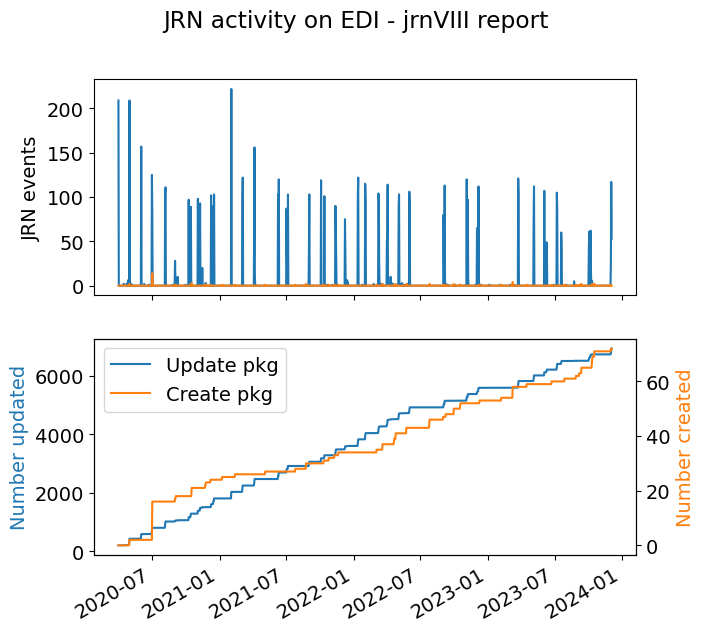

In [64]:
# All time plot:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(7, 7), sharex=True)

ax[0].plot(daily.index, daily.n_update, label='Update pkg')
ax[0].plot(daily.index, daily.n_create, label='Create pkg')
ax[0].set_ylabel('JRN events')

ax[1].plot(daily.index, daily.n_update.cumsum(), label='Update pkg')
plt.ylabel('Number updated', color='C0')
ax2 = ax[1].twinx()
ax2.plot(daily.index, daily.n_create.cumsum(), label='Create pkg', color='C1')
#ax[1].plot(daily.index, daily.n_tot.cumsum(), label='Total')

plt.ylabel('Number created', color='C1')
fig.autofmt_xdate()
plt.suptitle('JRN activity on EDI - {0} report'.format(reportname))
lines, labels = ax[1].get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)
import os
fig.savefig(os.path.expanduser("~/GD_gmaurer@nmsu/IM/figures/JRN_EDI_{0}_{1}.png".format(reportname, now)),
            dpi=150, bbox_inches='tight',facecolor='w')

### Total number of packages

In [41]:
daily.n_create.sum()

72

In [42]:
daily.n_update.sum()

6923

## Plot annual activity excluding Met

In [43]:
nomet = np.logical_and(df.studyid!='437', df.studyid!='548')
daily_nomet = edi.counts_to_daily(df.loc[nomet], fromdt=start_rpt)

daily_nomet.head()

,n_update,n_create,n_tot
date,,,
2020-04-15,2,0,0
2020-04-16,2,0,0
2020-04-17,0,0,0
2020-04-18,0,0,0
2020-04-19,0,0,0


### Total number of packages

In [44]:
daily_nomet.n_create.sum()

58

In [45]:
daily_nomet.n_update.sum()

135

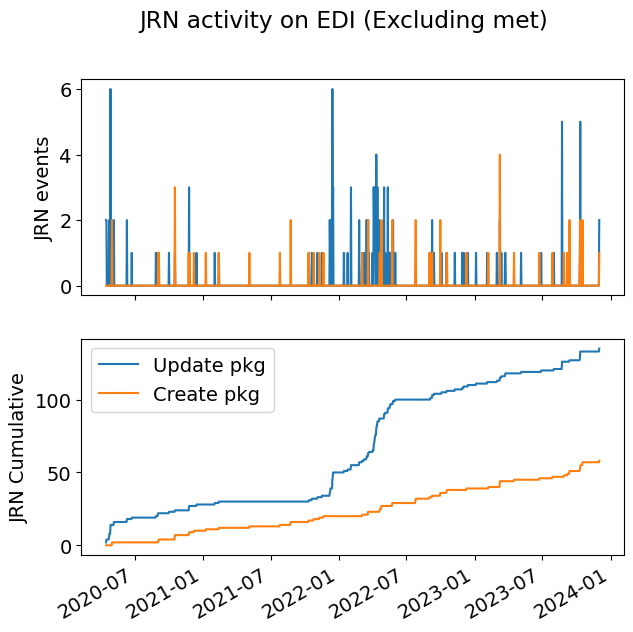

In [46]:
# Recent plot:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(7, 7), sharex=True)

ax[0].plot(daily_nomet.index, daily_nomet.n_update, label='Update pkg')
ax[0].plot(daily_nomet.index, daily_nomet.n_create, label='Create pkg')
ax[0].set_ylabel('JRN events')

ax[1].plot(daily_nomet.index, daily_nomet.n_update.cumsum(), label='Update pkg')
ax[1].plot(daily_nomet.index, daily_nomet.n_create.cumsum(), label='Create pkg')
#ax[1].plot(daily_nomet.index, daily_nomet.n_tot.cumsum(), label='$\Delta$ Total')
#ax[1].axhline(y=63, xmin=0, xmax=1, ls=':', lw=1.5, color='k',
#             label='Proposal goal')

plt.ylabel('JRN Cumulative')
fig.autofmt_xdate()
plt.suptitle('JRN activity on EDI (Excluding met)')
plt.legend()

fig.savefig(os.path.expanduser(
    "~/GD_gmaurer@nmsu/IM/figures/JRN_EDI_{0}_rpt_NoMet_{1}.png".format(reportname, now)),
            dpi=150, bbox_inches='tight',facecolor='w')

## Summary since last Annual Report

In [47]:
df.head()

,date,pkgid,action,n_update,n_create,n_delete,n_tot,studyid
date,,,,,,,,
2020-04-01 08:21:38.545,2020-04-01T08:21:38.545,210548016,updateDataPackage,1,0,0,0,548
2020-04-01 08:27:13.292,2020-04-01T08:27:13.292,210548031,updateDataPackage,1,0,0,0,548
2020-04-01 08:31:08.780,2020-04-01T08:31:08.78,210548076,updateDataPackage,1,0,0,0,548
2020-04-01 08:31:22.982,2020-04-01T08:31:22.982,210548046,updateDataPackage,1,0,0,0,548
2020-04-01 08:32:28.885,2020-04-01T08:32:28.885,210548025,updateDataPackage,1,0,0,0,548


In [48]:
# Unique packages updated (excluding met)
rEDI = df.copy()
rEDI_nomet = rEDI.loc[np.logical_and(rEDI.studyid!='437', rEDI.studyid!='548'),:]
print(len(rEDI.loc[rEDI.action=='updateDataPackage',]))
uniqueUp = rEDI.loc[rEDI.action=='updateDataPackage',].pkgid.unique()
uniqueUp_nomet = rEDI_nomet.loc[rEDI_nomet.action=='updateDataPackage',].pkgid.unique()
#rEDI.loc[rEDI.action=='updateDataPackage',].pkgid.unique()
print(uniqueUp)
print(uniqueUp_nomet)
print(len(uniqueUp))
len(uniqueUp_nomet)

6923
[210548016 210548031 210548076 210548046 210548025 210548061 210548001
 210548040 210548085 210548055 210548099 210548026 210548070 210548010
 210548041 210548086 210548056 210548100 210548027 210548071 210548011
 210548042 210548087 210548057 210548028 210548072 210548012 210548043
 210548088 210548058 210548101 210548029 210548073 210548013 210548044
 210548089 210548059 210548102 210548030 210548074 210548014 210548045
 210548090 210548060 210548103 210548017 210548075 210548015 210548032
 210548077 210548047 210548091 210548018 210548062 210548002 210548033
 210548078 210548048 210548092 210548019 210548063 210548003 210548034
 210548004 210548079 210548049 210548093 210548020 210548064 210548035
 210548080 210548050 210548094 210548005 210548021 210548065 210548036
 210548081 210548051 210548095 210548022 210548066 210548006 210548037
 210548082 210548052 210548096 210548023 210548067 210548007 210548038
 210548083 210548053 210548097 210548024 210548068 210548008 210548039
 

81

In [49]:
pkgtbl = pd.DataFrame({'Total':[daily.n_create.sum(), daily.n_update.sum(),len(uniqueUp)],
                       'Non-Met':[daily_nomet.n_create.sum(), daily_nomet.n_update.sum(),len(uniqueUp_nomet)]})
pkgtbl.index = ['New packages created', 'Package updates', 'Unique package updates']

print(pkgtbl)
# Write it
with open('tables_out/{}_rpt_edi.csv'.format(reportname), 'w') as f:
    f.write(pkgtbl.to_csv())

                        Total  Non-Met
New packages created       72       58
Package updates          6923      135
Unique package updates    304       81


In [50]:
uniqueUp2 = ['https://portal.edirepository.org/nis/mapbrowse?scope=knb-lter-jrn&identifier=' + str(s)
             for s in uniqueUp]
with open('tables_out/{0}_unique_EDI_updates_{1}.txt'.format(reportname, now), 'w') as f:
    for item in uniqueUp2:
        f.write("%s\n" % item)
        
uniqueUp2


['https://portal.edirepository.org/nis/mapbrowse?scope=knb-lter-jrn&identifier=210548016',
 'https://portal.edirepository.org/nis/mapbrowse?scope=knb-lter-jrn&identifier=210548031',
 'https://portal.edirepository.org/nis/mapbrowse?scope=knb-lter-jrn&identifier=210548076',
 'https://portal.edirepository.org/nis/mapbrowse?scope=knb-lter-jrn&identifier=210548046',
 'https://portal.edirepository.org/nis/mapbrowse?scope=knb-lter-jrn&identifier=210548025',
 'https://portal.edirepository.org/nis/mapbrowse?scope=knb-lter-jrn&identifier=210548061',
 'https://portal.edirepository.org/nis/mapbrowse?scope=knb-lter-jrn&identifier=210548001',
 'https://portal.edirepository.org/nis/mapbrowse?scope=knb-lter-jrn&identifier=210548040',
 'https://portal.edirepository.org/nis/mapbrowse?scope=knb-lter-jrn&identifier=210548085',
 'https://portal.edirepository.org/nis/mapbrowse?scope=knb-lter-jrn&identifier=210548055',
 'https://portal.edirepository.org/nis/mapbrowse?scope=knb-lter-jrn&identifier=210548099',

## Audit reporting

In [25]:
edia.request_audit(210011003)

Requesting access data for knb-lter-jrn.210011003
https://pasta.lternet.edu/audit/reads/knb-lter-jrn/210011003

    


,scope,identifier,revision,resource,total_reads,non_robot_reads
0,knb-lter-jrn,210011003,60,report,44,44
1,knb-lter-jrn,210011003,60,metadata,317,315
2,knb-lter-jrn,210011003,60,data,12,12
3,knb-lter-jrn,210011003,60,dataPackage,118,116
4,knb-lter-jrn,210011003,63,archive,2,2
5,knb-lter-jrn,210011003,63,report,66,65
6,knb-lter-jrn,210011003,63,dataPackage,231,227
7,knb-lter-jrn,210011003,63,data,21,21
8,knb-lter-jrn,210011003,63,metadata,398,393
9,knb-lter-jrn,210011003,101,data,51,51


In [51]:
# Get credentials - these could be anywhere....
import pyEDIutils.edicred as cred

In [54]:
# Get public data downloads for a scope from EDI audit report
# Sometimes this takes 2 tries
test = edia.request_audit_report('readDataEntity', cred.dn, cred.pw,
                               user='public', group=None,resid='knb-lter-jrn',
                               fromdt=start_rpt, todt=end_rpt,lim=1000000)

Requesting audit report for knb-lter-jrn starting 2020-03-05
https://pasta.lternet.edu/audit/report/?category=info&service=DataPackageManager-1.0&serviceMethod=readDataEntity&user=public&authSystem=https%3A%2F%2Fpasta.edirepository.org%2Fauthentication&resourceId=knb-lter-jrn&fromTime=2020-03-05&toTime=2023-12-31&limit=1000000




In [55]:
# What are the unique useragents and which should we screen out?
test.useragent.unique()

array(['Apache-HttpClient/4.3.3 (java 1.5)',
       'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.122 Safari/537.36',
       'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.132 Safari/537.36',
       'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.130 Safari/537.36',
       'Mozilla/5.0 (X11; Linux x86_64; rv:68.0) Gecko/20100101 Firefox/68.0',
       'lua-resty-http/0.10 (Lua) ngx_lua/10000',
       'Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:72.0) Gecko/20100101 Firefox/72.0',
       'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.88 Safari/537.36',
       'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.100 Safari/537.36',
       'DataONE-Python/3.4.7 +http://dataone.org/',
       'Mozilla/5.0 (Windows NT 6.3; Win

In [56]:
#Exclude DataOne, curl, and python-request agents, which are most likely not 'real users'
searchfor = ['DataONE', 'python-requests', 'curl', 'Turnitin', ]
auto_agents = test.useragent.str.contains('|'.join(searchfor), regex=True)
print(len(test))
test_filt = test.loc[~auto_agents, :]
print(len(test_filt))

61950
30746


In [57]:
# Calculate the daily values
test_filt.index = pd.to_datetime(test_filt.entry_dt)
test_filt['n'] = 1
print('Average daily public downloads: ', test_filt.shape[0]/365)
test_filt.head()

Average daily public downloads:  84.23561643835616


/tmp/ipykernel_1090985/1446458488.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_filt['n'] = 1


,entry_dt,method,resource_id,user,group,useragent,n
entry_dt,,,,,,,
2020-03-05 15:17:17,2020-03-05T15:17:17,readDataEntity,https://pasta.lternet.edu/package/data/eml/knb...,public,None,Apache-HttpClient/4.3.3 (java 1.5),1
2020-03-05 15:17:29,2020-03-05T15:17:29,readDataEntity,https://pasta.lternet.edu/package/data/eml/knb...,public,None,Apache-HttpClient/4.3.3 (java 1.5),1
2020-03-05 19:49:49,2020-03-05T19:49:49,readDataEntity,https://pasta.lternet.edu/package/data/eml/knb...,public,None,Apache-HttpClient/4.3.3 (java 1.5),1
2020-03-05 20:10:12,2020-03-05T20:10:12,readDataEntity,https://pasta.lternet.edu/package/data/eml/knb...,public,None,Apache-HttpClient/4.3.3 (java 1.5),1
2020-03-05 20:22:54,2020-03-05T20:22:54,readDataEntity,https://pasta.lternet.edu/package/data/eml/knb...,public,None,Apache-HttpClient/4.3.3 (java 1.5),1


In [58]:
dl = test_filt.n.resample('D').count()
dl.head()

entry_dt
2020-03-05    10
2020-03-06    16
2020-03-07     0
2020-03-08     0
2020-03-09     0
Freq: D, Name: n, dtype: int64

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

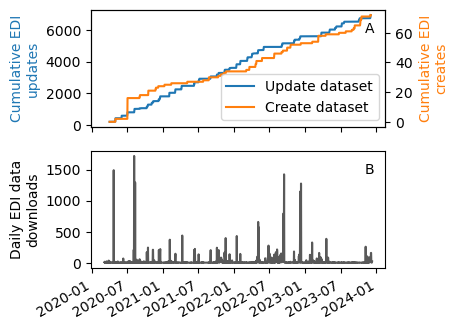

In [69]:
font = {'weight' : 'normal',
        'size'   : 10}

matplotlib.rc('font', **font)
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(3.8, 3.8), sharex=True)

ax[0].plot(daily.index, daily.n_update.cumsum(), label='Update dataset')
ax2 = ax[0].twinx()
ax2.plot(daily.index, daily.n_create.cumsum(), label='Create dataset', color='C1')
ax[0].set_ylabel('Cumulative EDI\nupdates', color='C0')
ax2.set_ylabel('Cumulative EDI\ncreates', color='C1')
ax2.text(0.93, 0.8, 'A', transform=ax2.transAxes) 
#ax[0].legend()
lines, labels = ax[0].get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='lower right')

ax[1].plot(dl, label='Download pkg', color='0.35')
#ax[1].plot(dl.index, daily_nomet.n_create.cumsum(), label='Create pkg')
#ax[1].plot(daily_nomet.index, daily_nomet.n_tot.cumsum(), label='$\Delta$ Total')
#ax[1].axhline(y=63, xmin=0, xmax=1, ls=':', lw=1.5, color='k',
#             label='Proposal goal')

ax[1].set_ylabel('Daily EDI data\ndownloads')
ax[1].text(0.93, 0.8, 'B', transform=ax[1].transAxes) 
fig.autofmt_xdate()
fig.savefig(os.path.expanduser(
    "~/GD_gmaurer@nmsu/IM/figures/JRN_EDI_{0}_rpt2_{1}.png".format(reportname,now)),
            dpi=150, bbox_inches='tight',facecolor='w')

## Get a list of packages updated within the date range

NOTE: this only works for the current annual report! Many packages get updated once per year at least, so they don't show up when running a previous year annual report.

The list is still available in the yearly "AR_unique_EDI_updates.csv"

If we could check prior revisions....

In [33]:
st = pd.to_datetime(start_rpt).isoformat() + 'Z'
en = pd.to_datetime(end_rpt).isoformat() + 'Z'
en

'2023-11-30T00:00:00Z'

In [34]:
import pyEDIutils.search as edis
updates = edis.search_pasta(query=['scope:knb-lter-jrn', 'pubdate:[{0} TO {1}]'.format(st, en)],
                  fields=('packageid','title','pubdate','keyword','author','begindate','enddate','doi'),
                  sortby='packageid,desc')
updates.to_csv('tables_out/{0}_PASTA_updates_solrsearch_{1}.csv'.format(reportname, now))
updates

https://pasta.lternet.edu/package/search/eml?defType=edismax&q=%2A&fq=scope%3Aknb-lter-jrn&fq=pubdate%3A%5B2022-12-01T00%3A00%3A00Z+TO+2023-11-30T00%3A00%3A00Z%5D&fl=packageid%2Ctitle%2Cpubdate%2Ckeyword%2Cauthor%2Cbegindate%2Cenddate%2Cdoi&sort=packageid%2Cdesc&rows=500


,packageid,title,pubdate,keywords,authors,begindate,enddate,doi
0,knb-lter-jrn.210586002.3,Dataset and analyses for publication entitled:...,2023,inorganic nutrients;organic matter;grasslands;...,"Currier, Courtney;Reichmann, Lara;Sala, Osvaldo E",1876-01-01,2021-12-31,doi:10.6073/pasta/f2c47d19074337832ee4e720e2a0...
1,knb-lter-jrn.210586001.3,Soil and foliar carbon and nitrogen content an...,2023,inorganic nutrients;organic matter;grasslands;...,"Currier, Courtney;Reichmann, Lara;Sala, Osvaldo E",2011-06-01,2020-09-30,doi:10.6073/pasta/8929d93801db656ae1ad0f3a12a1...
2,knb-lter-jrn.210548103.28,Jornada Basin LTER Cross-scale Interactions St...,2023,detailed precipitation;meteorology;precipitati...,"Anderson, John",2017-08-11,2023-09-21,doi:10.6073/pasta/029c896133cb4571259ffe077822...
3,knb-lter-jrn.210548102.27,Jornada Basin LTER Cross-scale Interactions St...,2023,detailed precipitation;meteorology;precipitati...,"Anderson, John",2017-08-11,2023-09-21,doi:10.6073/pasta/e1236353b6a15d53aa8864788236...
4,knb-lter-jrn.210548101.28,Jornada Basin LTER Cross-scale Interactions St...,2023,detailed precipitation;meteorology;precipitati...,"Anderson, John",2017-08-11,2023-09-21,doi:10.6073/pasta/5fa75fe767589be1baaaa57e85de...
...,...,...,...,...,...,...,...,...
251,knb-lter-jrn.200047001.3,Map of ecological sites and ecological states ...,2023,plant communities;vegetation dynamics;Jornada ...,"Burkett, Laura M;Bestelmeyer, Brandon T",2014-01-01,2021-03-31,doi:10.6073/pasta/ad172f22b0abb8fad0998e34bca1...
252,knb-lter-jrn.200043001.1,Jornada Experimental Range (USDA-ARS) monthly ...,2023,Jornada Experimental Range;goat;horse;sheep;LT...,"Ragosta, John P;Havstad, Kris;Bestelmeyer, Bra...",1915-06-01,1952-12-31,doi:10.6073/pasta/2254860ed7a15c1016e24385700a...
253,knb-lter-jrn.200034001.1,Supplemental materials of the Castaño-Sánchez ...,2023,Raramuri Criollo;grain finishing;beef producti...,"Castaño-Sánchez, Jose P.;Rotz, C. Alan;McIntos...",2020-07-01,2020-11-05,doi:10.6073/pasta/7afd0b152f5795b63dba4cb1941c...
254,knb-lter-jrn.200021001.5,Data to explore circular manureshed management...,2023,crop-livestock integration;manureshed;LTAR;ani...,"Spiegal, Sheri;Vendramini, João M.B.;Bittman, ...",2010-01-01,2019-12-31,doi:10.6073/pasta/6025924b89e313f25bddf1912c8a...
